# PS1: Exploratory Data Analysis on COVID-19 Datasets


### Learning the data using visualization and simple linear regression

1. First, run the example and understand the ML process and be familir with Python package functions for simple linear regression. 

2. Apply exploratory data analysis and simple regression on COVID-19 dataset(s). 

#### Write your name

- Justin Nguyen


###  Simple Linear Regression example

Follow the code and observe the results

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

The code expects the data files to be located in the current directory. Fetch the files in datasets/lifesat.

In [4]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [5]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [6]:
# Download the data
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

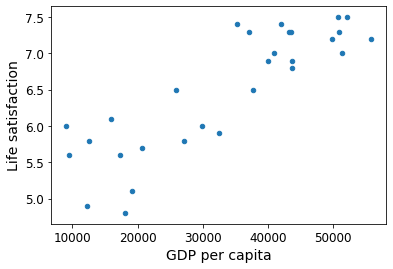

In [7]:
# Code example of load the data and prepared the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()


### Plot scatterplot and the regression function

In [8]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model (we use all data for training --> Later we will divide the data into training data and testing data)
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

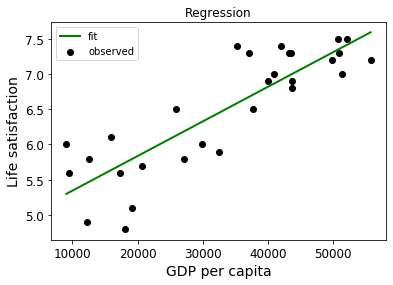

In [9]:
# Plot scatterplot and the regression function
plt.scatter(X, y, color='black', label='observed')

plt.plot(X, model.predict(X), label='fit', color='Green', linewidth=2)

plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.title('Regression')
plt.legend(loc='best')

plt.show()

In [10]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Model Evaluation Example

#### 1. Preparing X and Y using pandas
- We already did this process above
- scikit-learn expects X (feature matrix) and Y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

#### 2. Splitting X and y into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### 3. Linear regression in scikit-learn

In [12]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 4. Making predictions

In [13]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

#### 5. Computing the RMSE for our Sales predictions

In [14]:
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.4198326061843324


### Assignment


###  Part 1: Explore insight of the data using other visualization tools

The following Git repository is for the COVID-19 visual dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering:
https://github.com/CSSEGISandData/COVID-19

Read the information on the dashboard and check the datasets details

Datasets are located in a folder: csse_covid_19_data

### Tasks

1. Select attributes (columns) you are interested (either US only or all data).

   1.1 (optional) If you find any missing data or/and invalid data in the selected attributes you would like to work on, apply tools to handle these data. 

2. Conduct exploratory data analysis on the selected data and visualize the data. This may include the following but not limited:

(a) The mean, median and standard deviation

(b) Draw boxplots

(c) Draw histograms

(c) Draw scatter plots

(d) simple linear regression function with a scatter plot

In [101]:
import pandas as pd

In [102]:
df = pd.read_csv('./datasets/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports_us/04-15-2020.csv')

In [103]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-15 22:56:51,32.3182,-86.9023,4075,118,NaN,3957.0,1.0,86.907433,34077.0,525.0,2.895706,84000001,USA,726.759406,12.883436
1,Alaska,US,2020-04-15 22:56:51,61.3707,-152.4044,293,9,106.0,284.0,2.0,49.017230,8664.0,34.0,3.071672,84000002,USA,1449.437808,11.604096
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-15 22:56:51,33.7298,-111.4312,3964,142,385.0,3822.0,4.0,54.460147,45310.0,590.0,3.582240,84000004,USA,622.499817,14.883956
4,Arkansas,US,2020-04-15 22:56:51,34.9697,-92.3731,1569,33,489.0,1536.0,5.0,60.601917,21834.0,130.0,2.103250,84000005,USA,843.328401,8.285532
5,California,US,2020-04-15 22:56:51,36.1162,-119.6816,26686,861,NaN,25825.0,6.0,68.061564,216486.0,5163.0,3.226411,84000006,USA,552.138790,19.347223
6,Colorado,US,2020-04-15 22:56:51,39.0598,-105.3111,7956,328,NaN,7628.0,8.0,140.396374,39580.0,1556.0,4.122675,84000008,USA,698.452552,19.557567
7,Connecticut,US,2020-04-15 22:56:51,41.5978,-72.7554,14755,868,NaN,13887.0,9.0,413.851676,50143.0,1908.0,5.882752,84000009,USA,1406.422540,12.931210
8,Delaware,US,2020-04-15 22:56:51,39.3185,-75.5071,2014,46,354.0,1968.0,10.0,206.826295,13102.0,208.0,2.284012,84000010,USA,1345.500552,10.327706
9,Diamond Princess,US,2020-04-15 22:56:51,NaN,NaN,49,0,0.0,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [104]:
df = df.drop(columns=['Last_Update', 'Lat', 'Long_', 'FIPS', 'Incident_Rate', 'UID', 'ISO3'])

In [105]:
df

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,US,4075,118,NaN,3957.0,34077.0,525.0,2.895706,726.759406,12.883436
1,Alaska,US,293,9,106.0,284.0,8664.0,34.0,3.071672,1449.437808,11.604096
2,American Samoa,US,0,0,NaN,NaN,3.0,NaN,NaN,5.391708,NaN
3,Arizona,US,3964,142,385.0,3822.0,45310.0,590.0,3.582240,622.499817,14.883956
4,Arkansas,US,1569,33,489.0,1536.0,21834.0,130.0,2.103250,843.328401,8.285532
5,California,US,26686,861,NaN,25825.0,216486.0,5163.0,3.226411,552.138790,19.347223
6,Colorado,US,7956,328,NaN,7628.0,39580.0,1556.0,4.122675,698.452552,19.557567
7,Connecticut,US,14755,868,NaN,13887.0,50143.0,1908.0,5.882752,1406.422540,12.931210
8,Delaware,US,2014,46,354.0,1968.0,13102.0,208.0,2.284012,1345.500552,10.327706
9,Diamond Princess,US,49,0,0.0,49.0,NaN,NaN,0.000000,NaN,NaN


In [106]:
df = df.fillna(df.mean())
df

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,US,4075,118,2859.40625,3957.000000,34077.000000,525.000000,2.895706,726.759406,12.883436
1,Alaska,US,293,9,106.00000,284.000000,8664.000000,34.000000,3.071672,1449.437808,11.604096
2,American Samoa,US,0,0,2859.40625,9584.965517,3.000000,2119.163265,3.445025,5.391708,15.179869
3,Arizona,US,3964,142,385.00000,3822.000000,45310.000000,590.000000,3.582240,622.499817,14.883956
4,Arkansas,US,1569,33,489.00000,1536.000000,21834.000000,130.000000,2.103250,843.328401,8.285532
5,California,US,26686,861,2859.40625,25825.000000,216486.000000,5163.000000,3.226411,552.138790,19.347223
6,Colorado,US,7956,328,2859.40625,7628.000000,39580.000000,1556.000000,4.122675,698.452552,19.557567
7,Connecticut,US,14755,868,2859.40625,13887.000000,50143.000000,1908.000000,5.882752,1406.422540,12.931210
8,Delaware,US,2014,46,354.00000,1968.000000,13102.000000,208.000000,2.284012,1345.500552,10.327706
9,Diamond Princess,US,49,0,0.00000,49.000000,57906.339286,2119.163265,0.000000,1091.853820,15.179869


In [107]:
df = df.drop(df[df.Recovered > df.Confirmed].index)

In [108]:
df.describe()

,Confirmed,Deaths,Recovered,Active,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,12349.450980,550.686275,1893.982843,11798.764706,64227.052521,2226.486595,3.189604,1173.035704,14.966435
std,31414.424781,1676.180641,3382.312888,29750.924178,83678.514149,6481.267866,1.513822,566.162160,6.136496
min,49.000000,0.000000,0.000000,49.000000,382.000000,9.000000,0.000000,356.117388,4.366438
25%,1153.500000,26.500000,317.000000,1134.500000,18729.500000,179.500000,2.391664,748.850406,10.254594
50%,3360.000000,122.000000,908.000000,3238.000000,40242.000000,663.000000,3.100080,1091.853820,14.854960
75%,10487.000000,405.500000,2859.406250,10055.500000,69689.500000,2119.163265,4.101200,1402.575440,19.271826
max,214454.000000,11617.000000,23887.000000,202837.000000,526012.000000,46201.000000,6.846288,3119.691715,31.085973


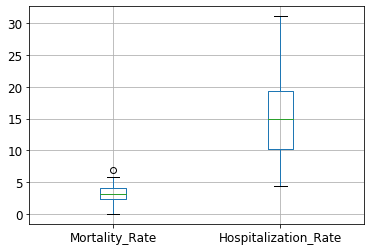

In [109]:
df.boxplot(column=['Mortality_Rate', 'Hospitalization_Rate'])

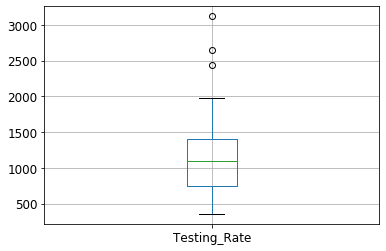

In [110]:
df.boxplot(column=['Testing_Rate'])

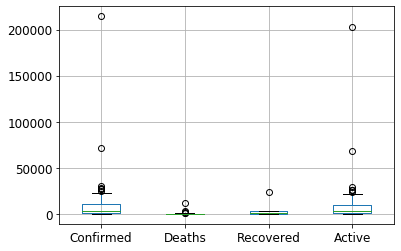

In [111]:
df.boxplot(column=['Confirmed', 'Deaths', 'Recovered', 'Active'])

In [112]:
temp_df = df.drop(columns=['Confirmed', 'Deaths', 'Recovered', 'Active', 'People_Tested', 'People_Hospitalized'])

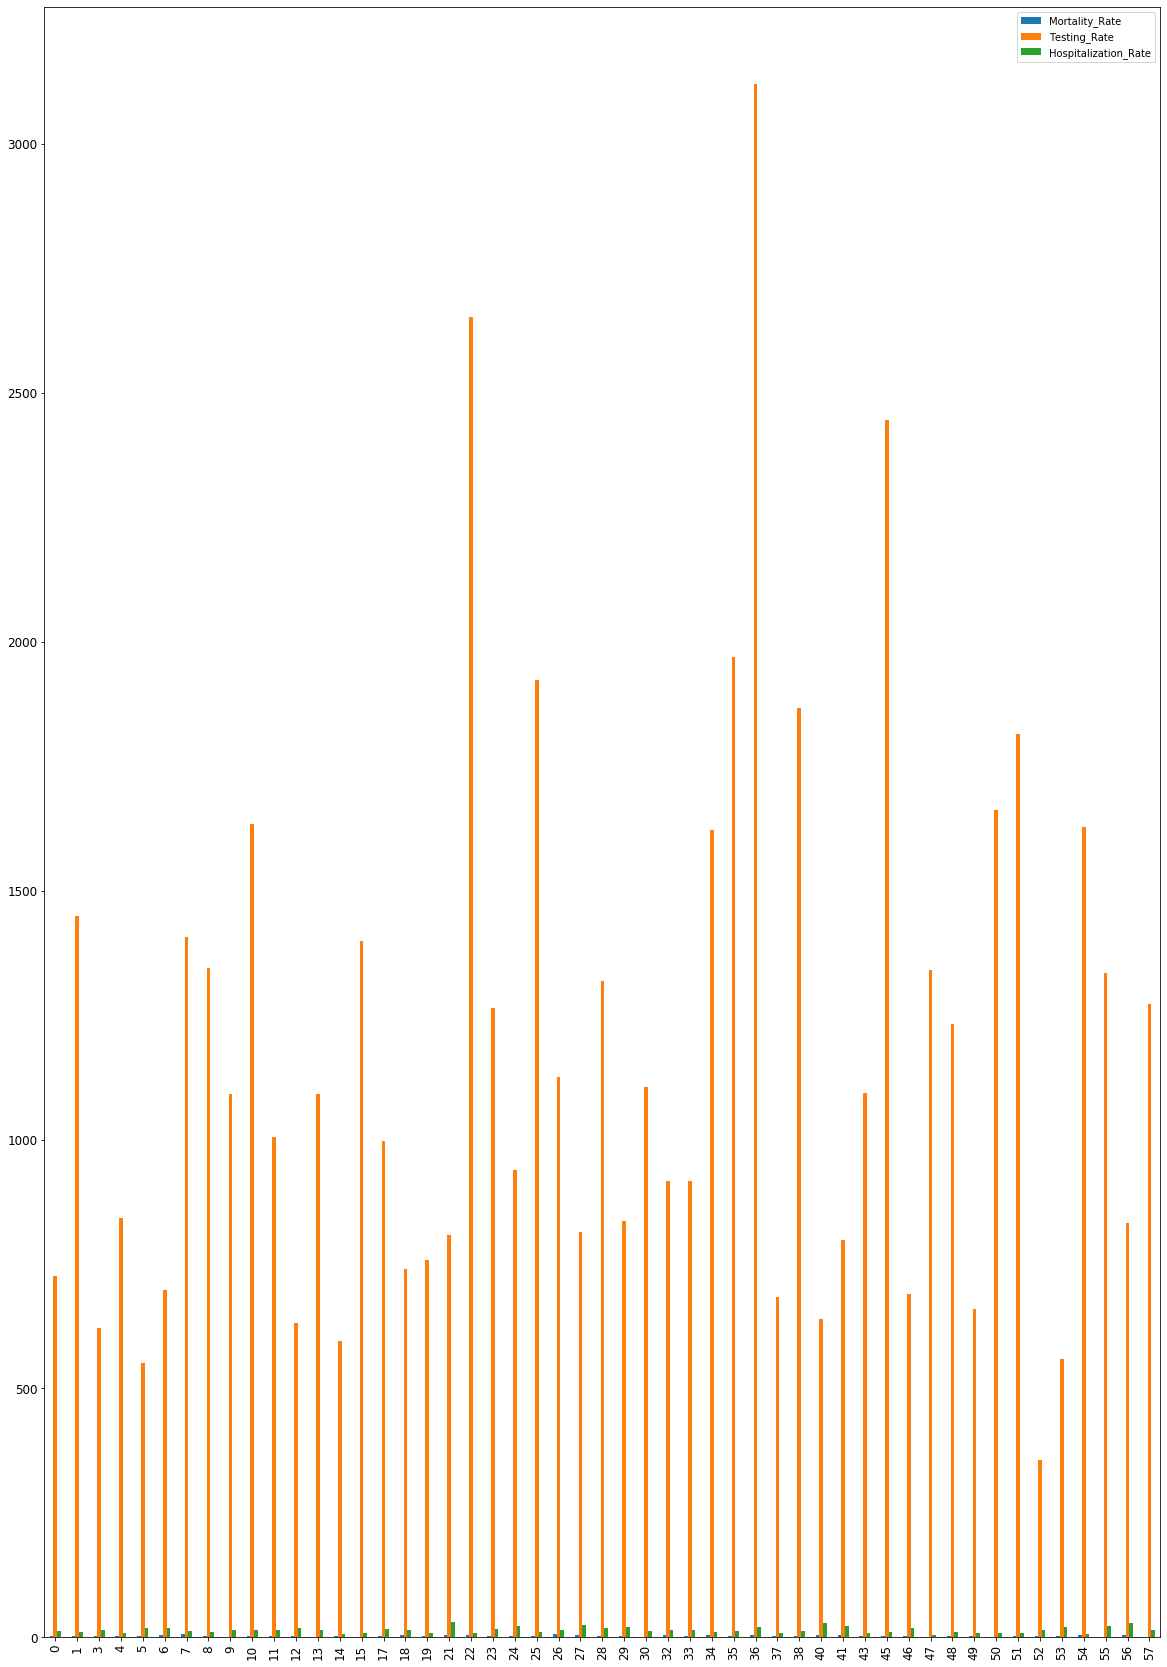

In [113]:
temp_df.plot(kind='bar', figsize=[20,30])

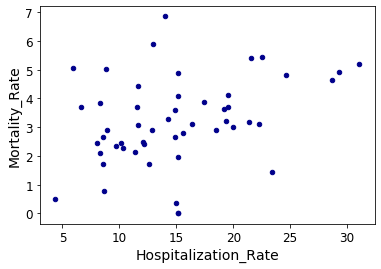

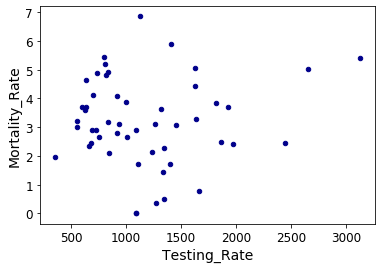

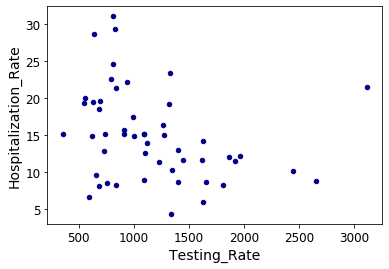

In [100]:
ax1 = df.plot.scatter(x='Hospitalization_Rate',y='Mortality_Rate',c='DarkBlue')
ax1 = df.plot.scatter(x='Testing_Rate',y='Mortality_Rate',c='DarkBlue')
ax1 = df.plot.scatter(x='Testing_Rate',y='Hospitalization_Rate',c='DarkBlue')

In [120]:
model1 = sklearn.linear_model.LinearRegression()
feature_cols = ['Hospitalization_Rate']
X1 = df[feature_cols]
y = df.Mortality_Rate
model1.fit(X1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

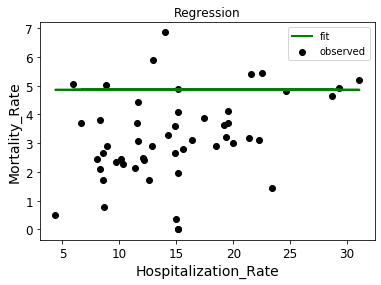

In [122]:
plt.scatter(X1, y, color='black', label='observed')

plt.plot(X1, model.predict(X1), label='fit', color='Green', linewidth=2)

plt.xlabel('Hospitalization_Rate')
plt.ylabel('Mortality_Rate')
plt.title('Regression')
plt.legend(loc='best')

plt.show()

In [123]:
model2 = sklearn.linear_model.LinearRegression()
feature_cols = ['Testing_Rate']
X2 = df[feature_cols]
model1.fit(X2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

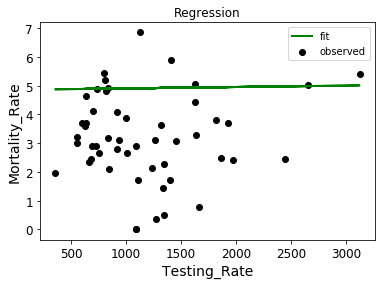

In [124]:
plt.scatter(X2, y, color='black', label='observed')

plt.plot(X2, model.predict(X2), label='fit', color='Green', linewidth=2)

plt.xlabel('Testing_Rate')
plt.ylabel('Mortality_Rate')
plt.title('Regression')
plt.legend(loc='best')

plt.show()

### Part 2: Write a summary of what you find from the data

For me I was hoping to find a potential correlation between testing rate
and mortality rate. Based on what I did with my data, I ended up getting a line that was barely positive but very close to horizontal. This would indicate that there's no real relationship between testing and mortality rate. I initialially was thinking going in that a higher testing rate might result in a lower mortality rate but that seems to not be true. 